In [71]:
# Yahoo Finance
!pip install yfinance
import yfinance as yf 
# Others
import pandas as pd
from plotly import graph_objs as go
from datetime import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [72]:
ySymbol=str('BBRI.JK')

In [73]:
#for SymbolName in stocksymbols:
df = yf.download(
    # tickers list or string as well
    tickers = ySymbol,
    # use "period" instead of start/end
    # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    # (optional, default is '1mo')
    period = "1y",
    # fetch data by interval (including intraday if period < 60 days)
    # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    # (optional, default is '1d')
    interval = "1d",
    # group by ticker (to access via data['SPY'])
    # (optional, default is 'column')
    group_by = 'ticker',
    # adjust all OHLC(An open-high-low-close chart is a type of chart typically used to illustrate movements in the price of a financial instrument over time) automatically
    # (optional, default is False)
    auto_adjust = True,
    # download pre/post regular market hours data
    # (optional, default is False)
    prepost = True
    )

[*********************100%***********************]  1 of 1 completed


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2021-11-08 to 2022-11-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    246 non-null    float64
 1   High    246 non-null    float64
 2   Low     246 non-null    float64
 3   Close   246 non-null    float64
 4   Volume  246 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.5 KB


In [75]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-01,4690.0,4700.0,4630.0,4660.0,230590200
2022-11-02,4680.0,4680.0,4570.0,4610.0,163816900
2022-11-03,4630.0,4660.0,4590.0,4650.0,174423000
2022-11-04,4650.0,4660.0,4610.0,4650.0,85292300
2022-11-07,4650.0,4690.0,4610.0,4690.0,84930700


In [76]:
df = df[["Close"]].copy()
df.describe()

,Close
count,246.000000
mean,4323.590209
std,247.922076
min,3895.575684
25%,4072.500000
50%,4335.000000
75%,4527.500000
max,4940.000000


In [77]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())
print(f"ADF test statistics = {result[0]}")
print(f"p-value = {result[1]}")

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF test statistics = -1.6330530240908998
p-value = 0.4658930460399674
Critial Values:
   1%, -3.457437824930831
Critial Values:
   5%, -2.873459364726563
Critial Values:
   10%, -2.573122099570008


In [78]:
from statsmodels.graphics.tsaplots import plot_acf

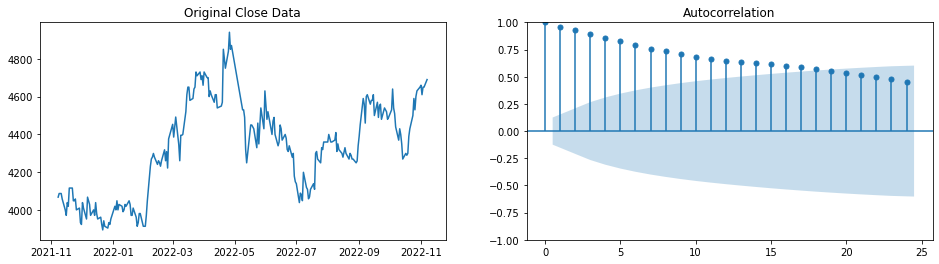

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Close)
ax1.set_title("Original Close Data")

plot_acf(df.Close, ax=ax2);

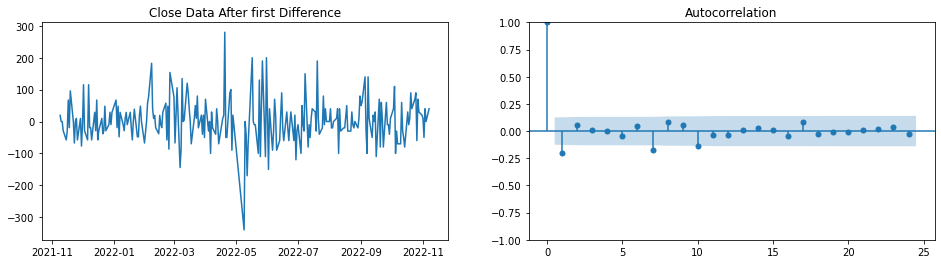

In [80]:
diff = df.Close.diff().dropna()

fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Close Data After first Difference")

plot_acf(diff, ax=ax2);

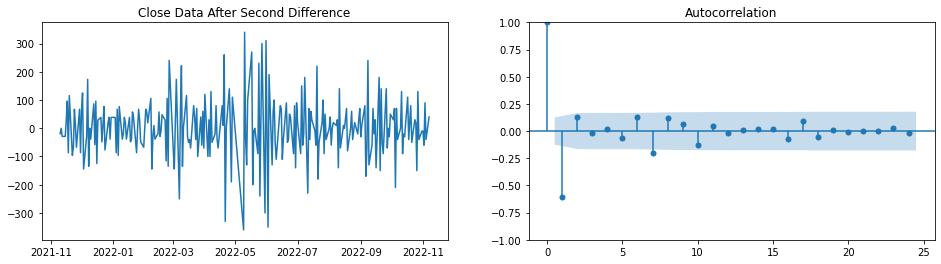

In [81]:
diff = df.Close.diff().diff().dropna()

fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Close Data After Second Difference")

plot_acf(diff, ax=ax2);

In [82]:
from statsmodels.graphics.tsaplots import plot_pacf

/Users/netrialiarahmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


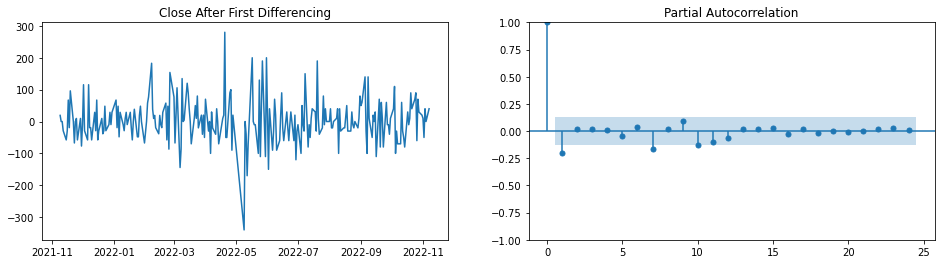

In [83]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)

ax1.set_title("Close After First Differencing")

ax2.set_ylim(0, 1)

plot_pacf(diff, ax=ax2);

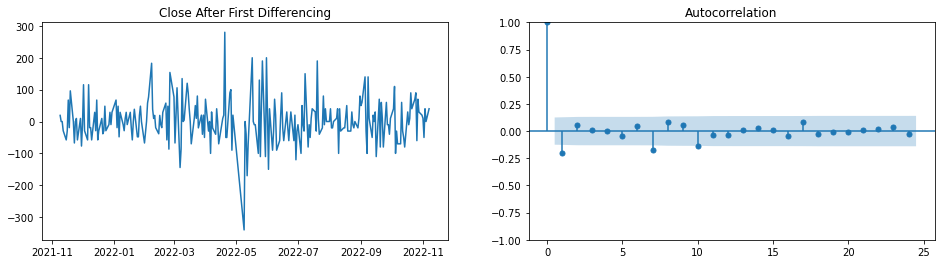

In [84]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))


ax1.plot(diff)

ax1.set_title("Close After First Differencing")

ax2.set_ylim(0, 1)

plot_acf(diff, ax=ax2);

In [85]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.Close, order=(6,1,4))
model_fit = model.fit()
print(model_fit.summary())

/Users/netrialiarahmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/netrialiarahmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/netrialiarahmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/netrialiarahmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. U

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  246
Model:                 ARIMA(6, 1, 4)   Log Likelihood               -1376.141
Date:                Mon, 07 Nov 2022   AIC                           2774.282
Time:                        21:31:17   BIC                           2812.796
Sample:                             0   HQIC                          2789.791
                                - 246                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4084      0.112     -3.644      0.000      -0.628      -0.189
ar.L2         -0.0897      0.110     -0.814      0.416      -0.306       0.126
ar.L3         -0.1598      0.073     -2.175      0.0

/Users/netrialiarahmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(array([2.19040106e-03, 8.35322439e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.28136044e-06]),
 array([-311.07726064,  126.90170565,  564.88067195, 1002.85963825,
        1440.83860455, 1878.81757085, 2316.79653715, 2754.77550345,
        3192.75446975, 3630.73343604, 4068.71240234]),
 <BarContainer object of 10 artists>)

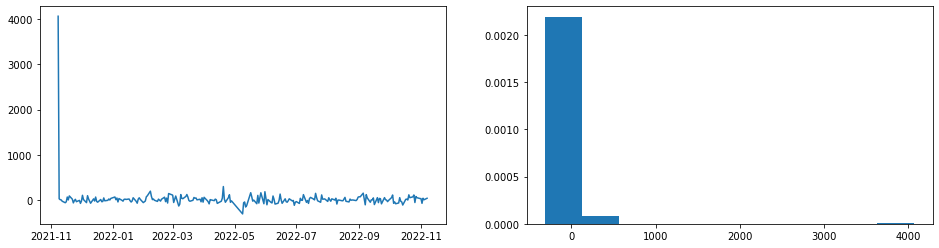

In [86]:
#plotting residual errors

residuals = pd.DataFrame(model_fit.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)

ax2.hist(residuals, density=True)

In [87]:
# model_fit.plot_predict(dynamic=False)
# plt.show()

In [88]:
train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

testshape = test.shape

print(train.shape)
print(test.shape)

(172, 1)
(74, 1)


In [89]:
model = ARIMA(train, order=(6, 1, 4))  
res = model.fit() 
#forecast shape
pred = res.forecast(steps=testshape[0])
conf = res.get_forecast(steps=testshape[0], alpha = 0.05)  # = 95% confidence
# #create confidence levels
confidence = conf.conf_int(alpha=0.05)

lower1 = pd.Series(confidence['lower Close'])
upper1 = pd.Series(confidence['upper Close'])

fc_series = pd.Series(data = pred.values, index=test.index)
lower_series = pd.Series(data = lower1.values, index=test.index, name = 'lower Series')
upper_series = pd.Series(data = upper1.values, index=test.index, name=None)

print(lower_series)

/Users/netrialiarahmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/netrialiarahmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/netrialiarahmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/netrialiarahmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. U

Date
2022-07-26    4042.690234
2022-07-27    3988.251983
2022-07-28    3941.885108
2022-07-29    3855.686290
2022-08-01    3856.934705
                 ...     
2022-11-01    3182.286718
2022-11-02    3190.799944
2022-11-03    3179.740551
2022-11-04    3162.768359
2022-11-07    3173.396334
Name: lower Series, Length: 74, dtype: float64


/Users/netrialiarahmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/netrialiarahmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/netrialiarahmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


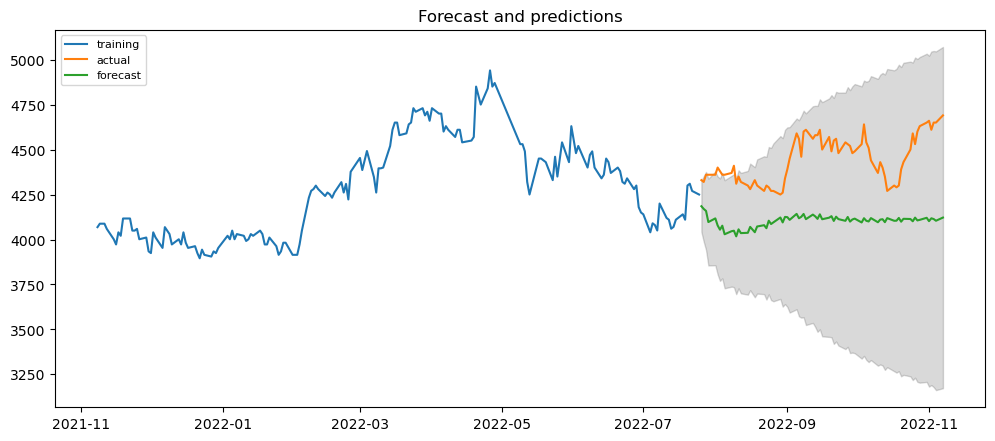

In [90]:
plt.figure(figsize=(12,5), dpi=100)

plt.plot(train, label='training')

plt.plot(test, label='actual')

plt.plot(fc_series, label='forecast')

plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)


plt.title('Forecast and predictions')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [91]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(fc_series,test))
print(rmse)

363.4820685253528


In [93]:
df.to_csv('data saham BBRI.csv')